In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from io import StringIO
from itertools import product

In [2]:
s_dict = {}

s_dict["NoiseFree-TargetShift-FeatureShift"] = """Before Correction & {\color{black}30.534} ({\color{black}23.611}) & {\color{black}31.818} ({\color{black}24.638}) & {\color{black}18.097} ({\color{black}13.463}) \\
Oracle & {\color{black}0.000} ({\color{black}0.000}) & {\color{black}0.000} ({\color{black}0.000}) & {\color{black}0.000} ({\color{black}0.000}) \\
Gaussian OT & {\color{red}9.423} ({\color{red}17.794}) & {\color{red}8.792} ({\color{red}10.733}) & {\color{black}4.582} ({\color{black}3.795}) \\
MMD & {\color{black}8.281} ({\color{black}6.065}) & {\color{black}7.655} ({\color{black}5.586}) & {\color{red}116.770} ({\color{red}79.574}) \\
ConDo Linear-ReverseKL & {\color{green}0.501} ({\color{green}1.121}) & {\color{green}1.376} ({\color{green}1.443}) & {\color{black}3.234} ({\color{black}2.738}) \\
ConDo GP-ReverseKL & {\color{black}0.551} ({\color{black}1.112}) & {\color{black}1.422} ({\color{black}1.660}) & {\color{black}2.299} ({\color{black}2.190}) \\
ConDo PoGMM-ReverseKL & {\color{black}0.922} ({\color{black}1.116}) & {\color{black}1.632} ({\color{black}1.533}) & {\color{green}2.241} ({\color{green}2.172}) \\
ConDo MMD & {\color{black}2.927} ({\color{black}2.067}) & {\color{black}4.617} ({\color{black}3.366}) & {\color{black}4.486} ({\color{black}3.174}) \\"""

s_dict["NoiseFree-TargetShift-NoFeatureShift"] = """Before Correction & {\color{black}0.000} ({\color{black}0.000}) & {\color{black}0.000} ({\color{black}0.000}) & {\color{black}0.000} ({\color{black}0.000}) \\
Oracle & {\color{black}0.000} ({\color{black}0.000}) & {\color{black}0.000} ({\color{black}0.000}) & {\color{black}0.000} ({\color{black}0.000}) \\
Gaussian OT & {\color{red}9.638} ({\color{red}16.972}) & {\color{red}7.496} ({\color{red}9.569}) & {\color{black}4.058} ({\color{black}3.470}) \\
MMD & {\color{black}8.804} ({\color{black}6.823}) & {\color{black}7.483} ({\color{black}5.803}) & {\color{red}5.960} ({\color{red}4.817}) \\
ConDo Linear-ReverseKL & {\color{black}0.206} ({\color{black}0.158}) & {\color{green}0.718} ({\color{green}0.552}) & {\color{black}3.437} ({\color{black}2.841}) \\
ConDo GP-ReverseKL & {\color{green}0.194} ({\color{green}0.148}) & {\color{black}0.719} ({\color{black}0.550}) & {\color{black}1.236} ({\color{black}1.053}) \\
ConDo PoGMM-ReverseKL & {\color{black}0.628} ({\color{black}0.475}) & {\color{black}0.855} ({\color{black}0.638}) & {\color{black}0.861} ({\color{black}0.721}) \\
ConDo MMD & {\color{black}2.794} ({\color{black}2.254}) & {\color{black}2.949} ({\color{black}2.280}) & {\color{green}0.000} ({\color{green}0.000}) \\"""

s_dict["NoiseFree-NoTargetShift-FeatureShift"] = """Before Correction & {\color{black}24.325} ({\color{black}24.455}) & {\color{black}22.504} ({\color{black}24.451}) & {\color{black}14.020} ({\color{black}13.445}) \\
Oracle & {\color{black}0.000} ({\color{black}0.000}) & {\color{black}0.000} ({\color{black}0.000}) & {\color{black}0.000} ({\color{black}0.000}) \\
Gaussian OT & {\color{black}1.273} ({\color{black}1.258}) & {\color{black}2.045} ({\color{black}2.139}) & {\color{green}2.017} ({\color{green}1.931}) \\
MMD & {\color{red}3.307} ({\color{red}3.223}) & {\color{red}2.410} ({\color{red}2.500}) & {\color{red}3.677} ({\color{red}3.691}) \\
ConDo Linear-ReverseKL & {\color{green}1.130} ({\color{green}1.104}) & {\color{black}1.597} ({\color{black}1.520}) & {\color{black}2.596} ({\color{black}2.508}) \\
ConDo GP-ReverseKL & {\color{black}1.138} ({\color{black}1.114}) & {\color{black}1.726} ({\color{black}1.651}) & {\color{black}2.135} ({\color{black}2.091}) \\
ConDo PoGMM-ReverseKL & {\color{black}1.158} ({\color{black}1.134}) & {\color{black}1.466} ({\color{black}1.417}) & {\color{black}2.361} ({\color{black}2.234}) \\
ConDo MMD & {\color{black}1.218} ({\color{black}1.162}) & {\color{green}1.327} ({\color{green}1.264}) & {\color{black}2.671} ({\color{black}2.476}) \\"""

s_dict["NoiseFree-NoTargetShift-NoFeatureShift"] = """Before Correction & {\color{black}0.000} ({\color{black}0.000}) & {\color{black}0.000} ({\color{black}0.000}) & {\color{black}0.000} ({\color{black}0.000}) \\
Oracle & {\color{black}0.000} ({\color{black}0.000}) & {\color{black}0.000} ({\color{black}0.000}) & {\color{black}0.000} ({\color{black}0.000}) \\
Gaussian OT & {\color{red}1.044} ({\color{red}1.095}) & {\color{black}1.328} ({\color{black}1.307}) & {\color{black}1.358} ({\color{black}1.231}) \\
MMD & {\color{black}0.971} ({\color{black}1.001}) & {\color{red}1.348} ({\color{red}1.343}) & {\color{red}1.505} ({\color{red}1.218}) \\
ConDo Linear-ReverseKL & {\color{black}0.192} ({\color{black}0.193}) & {\color{black}0.737} ({\color{black}0.709}) & {\color{black}1.147} ({\color{black}1.053}) \\
ConDo GP-ReverseKL & {\color{black}0.182} ({\color{black}0.183}) & {\color{green}0.688} ({\color{green}0.669}) & {\color{black}0.792} ({\color{black}0.732}) \\
ConDo PoGMM-ReverseKL & {\color{green}0.124} ({\color{green}0.128}) & {\color{black}0.747} ({\color{black}0.726}) & {\color{black}1.386} ({\color{black}1.364}) \\
ConDo MMD & {\color{black}0.222} ({\color{black}0.216}) & {\color{black}0.799} ({\color{black}0.790}) & {\color{green}0.478} ({\color{green}0.380}) \\"""

s_dict["Noisy-TargetShift-FeatureShift"] = """Before Correction & {\color{black}30.659} ({\color{black}23.746}) & {\color{black}31.474} ({\color{black}24.963}) & {\color{black}18.814} ({\color{black}13.150}) \\
Oracle & {\color{black}0.481} ({\color{black}0.441}) & {\color{black}0.487} ({\color{black}0.499}) & {\color{black}0.513} ({\color{black}0.483}) \\
Gaussian OT & {\color{red}9.459} ({\color{red}17.819}) & {\color{red}9.478} ({\color{red}11.663}) & {\color{black}5.694} ({\color{black}4.186}) \\
MMD & {\color{black}7.524} ({\color{black}5.539}) & {\color{black}9.063} ({\color{black}6.953}) & {\color{red}14.001} ({\color{red}9.732}) \\
ConDo Linear-ReverseKL & {\color{green}0.649} ({\color{green}1.224}) & {\color{black}1.608} ({\color{black}1.518}) & {\color{black}3.787} ({\color{black}2.517}) \\
ConDo GP-ReverseKL & {\color{black}0.697} ({\color{black}1.230}) & {\color{green}1.005} ({\color{green}1.365}) & {\color{green}2.262} ({\color{green}2.017}) \\
ConDo PoGMM-ReverseKL & {\color{black}1.036} ({\color{black}1.237}) & {\color{black}1.424} ({\color{black}1.391}) & {\color{black}2.381} ({\color{black}2.066}) \\
ConDo MMD & {\color{black}2.932} ({\color{black}2.136}) & {\color{black}4.925} ({\color{black}3.716}) & {\color{black}5.565} ({\color{black}3.609}) \\"""

s_dict["Noisy-TargetShift-NoFeatureShift"] = """Before Correction & {\color{black}1.025} ({\color{black}1.036}) & {\color{black}1.006} ({\color{black}0.993}) & {\color{black}1.007} ({\color{black}1.025}) \\
Oracle & {\color{black}1.025} ({\color{black}1.036}) & {\color{black}1.006} ({\color{black}0.993}) & {\color{black}1.007} ({\color{black}1.025}) \\
Gaussian OT & {\color{red}9.546} ({\color{red}17.371}) & {\color{black}8.269} ({\color{black}11.043}) & {\color{black}4.621} ({\color{black}3.903}) \\
MMD & {\color{black}7.263} ({\color{black}5.682}) & {\color{red}8.512} ({\color{red}6.642}) & {\color{red}4.660} ({\color{red}3.715}) \\
ConDo Linear-ReverseKL & {\color{black}1.032} ({\color{black}1.056}) & {\color{green}1.340} ({\color{green}1.241}) & {\color{black}3.962} ({\color{black}3.100}) \\
ConDo GP-ReverseKL & {\color{green}1.032} ({\color{green}1.057}) & {\color{black}1.549} ({\color{black}1.352}) & {\color{black}1.737} ({\color{black}1.442}) \\
ConDo PoGMM-ReverseKL & {\color{black}1.282} ({\color{black}1.178}) & {\color{black}1.488} ({\color{black}1.341}) & {\color{black}1.294} ({\color{black}1.149}) \\
ConDo MMD & {\color{black}3.010} ({\color{black}2.509}) & {\color{black}3.265} ({\color{black}2.708}) & {\color{green}1.007} ({\color{green}1.025}) \\"""

s_dict["Noisy-NoTargetShift-FeatureShift"] = """Before Correction & {\color{black}23.855} ({\color{black}24.127}) & {\color{black}24.825} ({\color{black}24.400}) & {\color{black}15.086} ({\color{black}13.863}) \\
Oracle & {\color{black}0.509} ({\color{black}0.524}) & {\color{black}0.518} ({\color{black}0.477}) & {\color{black}0.473} ({\color{black}0.503}) \\
Gaussian OT & {\color{black}1.368} ({\color{black}1.407}) & {\color{black}1.787} ({\color{black}1.890}) & {\color{black}2.572} ({\color{black}2.323}) \\
MMD & {\color{red}2.671} ({\color{red}2.643}) & {\color{red}2.481} ({\color{red}2.339}) & {\color{red}8.949} ({\color{red}8.748}) \\
ConDo Linear-ReverseKL & {\color{green}1.252} ({\color{green}1.277}) & {\color{black}1.518} ({\color{black}1.558}) & {\color{black}2.880} ({\color{black}2.560}) \\
ConDo GP-ReverseKL & {\color{black}1.255} ({\color{black}1.275}) & {\color{green}1.468} ({\color{green}1.563}) & {\color{green}2.241} ({\color{green}2.096}) \\
ConDo PoGMM-ReverseKL & {\color{black}1.271} ({\color{black}1.292}) & {\color{black}1.507} ({\color{black}1.535}) & {\color{black}3.058} ({\color{black}2.726}) \\
ConDo MMD & {\color{black}1.357} ({\color{black}1.358}) & {\color{black}1.794} ({\color{black}1.756}) & {\color{black}4.100} ({\color{black}3.681}) \\"""

s_dict["Noisy-NoTargetShift-NoFeatureShift"] = """Before Correction & {\color{black}1.018} ({\color{black}0.954}) & {\color{black}0.970} ({\color{black}0.970}) & {\color{black}1.069} ({\color{black}0.978}) \\
Oracle & {\color{black}1.018} ({\color{black}0.954}) & {\color{black}0.970} ({\color{black}0.970}) & {\color{black}1.069} ({\color{black}0.978}) \\
Gaussian OT & {\color{black}1.403} ({\color{black}1.364}) & {\color{red}1.671} ({\color{red}1.705}) & {\color{black}2.215} ({\color{black}2.706}) \\
MMD & {\color{red}1.549} ({\color{red}1.538}) & {\color{black}1.249} ({\color{black}1.265}) & {\color{red}2.522} ({\color{red}2.783}) \\
ConDo Linear-ReverseKL & {\color{green}1.069} ({\color{green}1.016}) & {\color{black}1.192} ({\color{black}1.195}) & {\color{black}2.032} ({\color{black}2.435}) \\
ConDo GP-ReverseKL & {\color{black}1.081} ({\color{black}1.026}) & {\color{black}1.060} ({\color{black}1.081}) & {\color{black}1.370} ({\color{black}1.426}) \\
ConDo PoGMM-ReverseKL & {\color{black}1.110} ({\color{black}1.072}) & {\color{black}1.136} ({\color{black}1.125}) & {\color{black}1.320} ({\color{black}1.371}) \\
ConDo MMD & {\color{black}1.075} ({\color{black}1.046}) & {\color{green}1.023} ({\color{green}1.046}) & {\color{green}1.064} ({\color{green}0.978}) \\"""

In [3]:
def trim_str(s):
    strimmed = s.replace(
        r"{\color{black}",""
    ).replace(
        r"{\color{green}",""
    ).replace(
        r"{\color{red}",""
    ).replace(
        r"}",""
    ).replace(
        r"&",""
    ).replace(
        r"(",""
    ).replace(
        r")",""
    #).replace(
    #    "\t"," "        
    ).replace(
        " \\",""
    ).replace(
        "  "," "
    ).replace(
        r"Gaussian OT","GaussianOT"
    ).replace(
        r"Before Correction","BeforeCorrection"
    ).replace(
        "ConDo ","ConDo-"
    ).replace(
        " ", "\t",
    ).replace(
       r"BeforeCorrection", "Before Correction",
    ).replace(
        r"GaussianOT","Gaussian OT"
    ).split("\n")[2:]
    return strimmed

cnames = [
    "Homoscedastic Linear", "Homoscedastic Linear Test",
    "Heteroscedastic Linear", "Heteroscedastic Linear Test",
    "Nonlinear", "Nonlinear Test"
]

In [4]:
settings = [
    ["NoiseFree", "Noisy"],
    ["TargetShift", "NoTargetShift"],
    ["FeatureShift", "NoFeatureShift"]
]
#fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(12,14))
for fix, (nset, tset, fset) in enumerate(product(*settings)):
    sset = f"{nset}-{tset}-{fset}"
    trim_s = trim_str(s_dict[sset])
    #print(trim_s)
    
    df = pd.read_csv(StringIO("\n".join(trim_s)), sep="\t", names=cnames)
    #df.reset_index()
    # sns.barplot(data=df.reset_index())
    #print(df.head())
    if nset == "NoiseFree":
        nix = 0
    else:
        nix = 1
    #df.T.plot.bar(ax=axes[fix-nix*4][nix], legend=fix==0, title=sset)

,index,variable,value
0,Gaussian OT,Homoscedastic Linear,1.403
1,MMD,Homoscedastic Linear,1.549
2,ConDo-Linear-ReverseKL,Homoscedastic Linear,1.069
3,ConDo-GP-ReverseKL,Homoscedastic Linear,1.081
4,ConDo-PoGMM-ReverseKL,Homoscedastic Linear,1.110


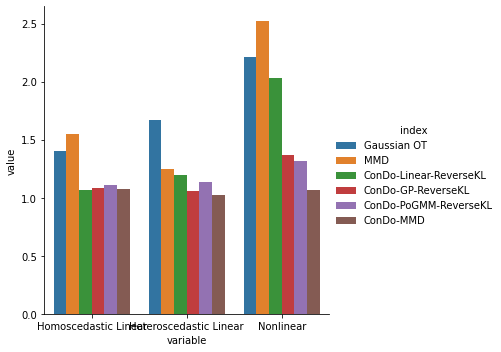

In [5]:
dfmelt = df.iloc[:,::2].reset_index().melt(id_vars="index")

sns.catplot(data=dfmelt, kind="bar", x="variable", y="value", hue="index")
dfmelt.head()

In [6]:
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["ytick.major.size"] = 2
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

plt.rc('font', size=7) #controls default text size
plt.rc('axes', titlesize=7) #fontsize of the title
plt.rc('axes', labelsize=7) #fontsize of the x and y labels
plt.rc('xtick', labelsize=7) #fontsize of the x tick labels
plt.rc('ytick', labelsize=7) #fontsize of the y tick labels
plt.rc('legend', fontsize=7) #fontsize of the legend
plt.ioff();

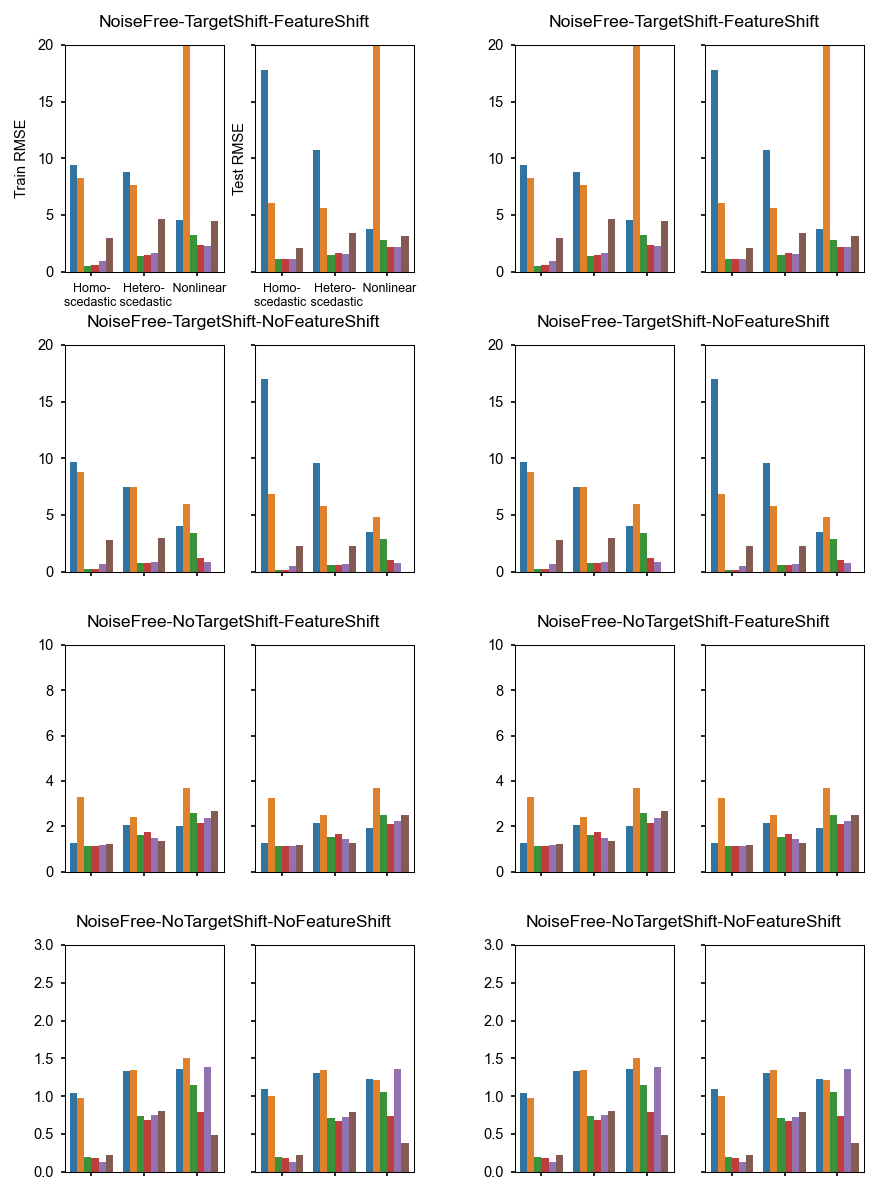

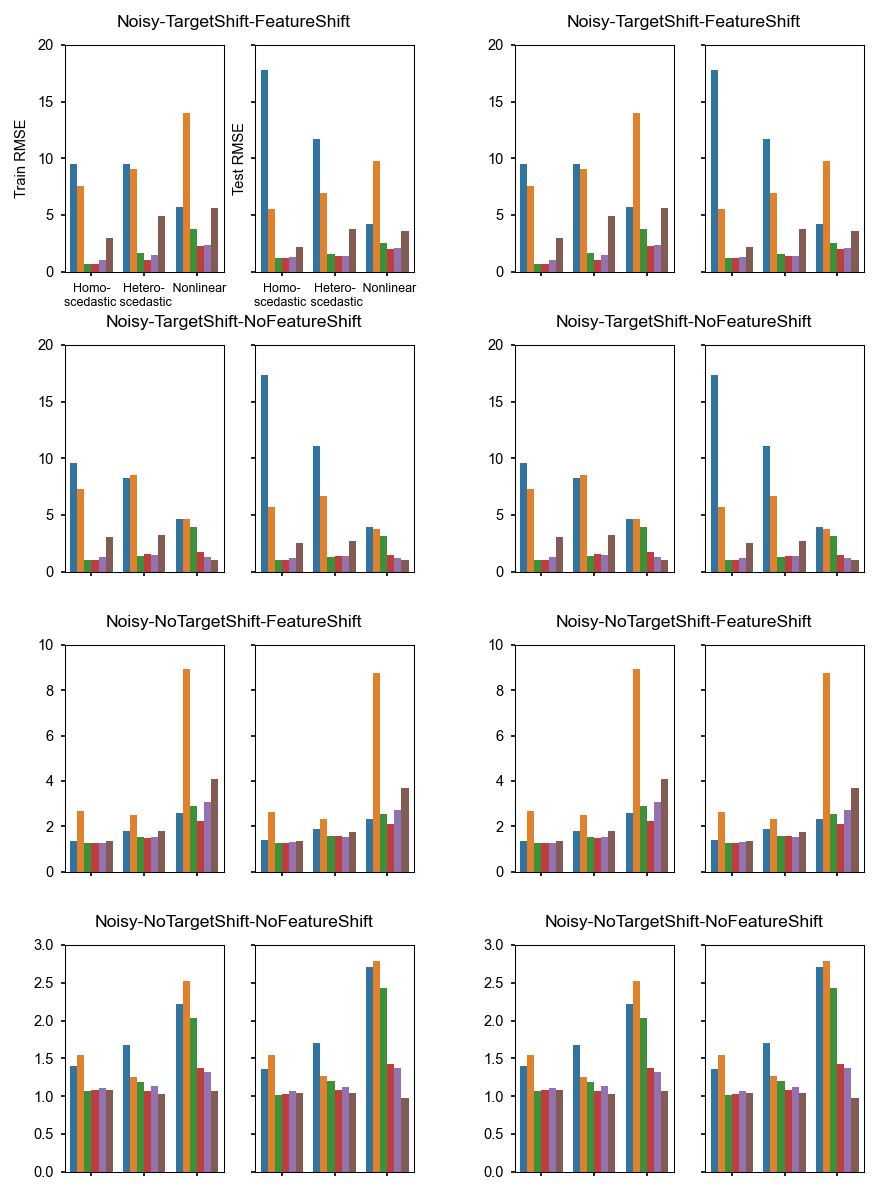

In [7]:

nsets = ["NoiseFree", "Noisy"]

for nset in nsets:
    fig = plt.figure(figsize=(6, 8), dpi=150)
    subfigs = fig.subfigures(4, 2, wspace=0.07, hspace=0.1)
    subrows = list(product(
        *[["TargetShift", "NoTargetShift"], ["FeatureShift", "NoFeatureShift"]]
    ))

    for subrowix in range(4):
        subrow = subrows[subrowix]
        tset, fset = subrow
        for subcolix in range(2):
            axes = subfigs[subrowix, subcolix].subplots(1, 2, sharey=True)
            for axix in range(2):
                # 0 (train) vs 1 (test)
                sset = f"{nset}-{tset}-{fset}"
                trim_s = trim_str(s_dict[sset])
                df = pd.read_csv(StringIO("\n".join(trim_s)), sep="\t", names=cnames)
                dfmelt = df.iloc[:,axix::2].reset_index().melt(id_vars="index")
                sns.barplot(
                    data=dfmelt, x="variable", y="value", hue="index", 
                    ax=axes[axix]
                )
                axes[axix].get_legend().remove()
                if subrowix == 0 and subcolix == 0:
                    axes[axix].set_xticklabels(
                        [
                            'Homo-\nscedastic ',
                            'Hetero-\n scedastic', ' Nonlinear'
                        ],
                        fontsize=6, rotation=0);
                else:
                    axes[axix].set_xticklabels(['', '', '']);
                axes[axix].set_xlabel('');
                axes[axix].set_ylabel('');
                if subrowix in (0, 1):
                    axes[axix].set_ylim(0, 20);
                elif subrowix in (2,):
                    axes[axix].set_ylim(0, 10);
                else:
                    axes[axix].set_ylim(0, 3);
            if subrowix == 0 and subcolix == 0:
                axes[0].set_ylabel('Train RMSE', fontsize=7);
                axes[1].set_ylabel('Test RMSE', fontsize=7);
            subfigs[subrowix, subcolix].suptitle(sset);
    plt.savefig(f'figure-continuous1d-{nset}.pdf');